# Regressão Logística

[https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

### Bibliotecas e Carregamento

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../datasets/titanic_train.csv')

### Informações iniciais

| Variable	|	Definition	|	Key |
| -- | -- | -- |
| `Survived`	|	Survival	|	0 = No, 1 = Yes |
| `Pclass`	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd |
| `Name`	|	Name	|	 |
| `Sex`	|	Sex	|	 |
| `Age`	|	Age in years	|	 |
| `SibSp`	|	# of siblings / spouses aboard the Titanic	|	 |
| `Parch`	|	# of parents / children aboard the Titanic	|	 |
| `Ticket`	|	Ticket number	|	 |
| `Fare`	|	Passenger fare	|	 |
| `Cabin`	|	Cabin number	|	 |
| `Embarked`	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton |

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Dados faltantes

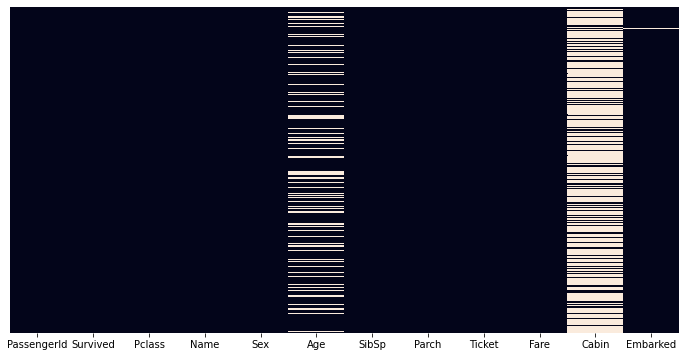

In [92]:
plt.figure(figsize=(12, 6))
_ = sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [31]:
print('Cabin', df['Cabin'].isnull().sum()/df.shape[0])
print('Age', df['Age'].isnull().sum()/df.shape[0])

Cabin 0.7710437710437711
Age 0.19865319865319866


<AxesSubplot:>

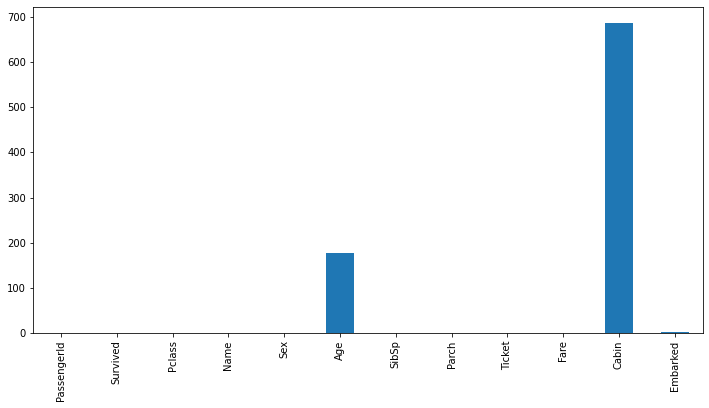

In [91]:
df.isnull().sum().plot.bar(figsize=(12, 6))

#### Contagens

<AxesSubplot:xlabel='Survived', ylabel='count'>

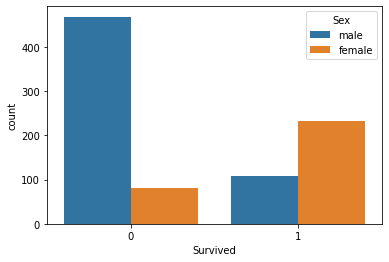

In [47]:
sns.countplot(x='Survived', data=df, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

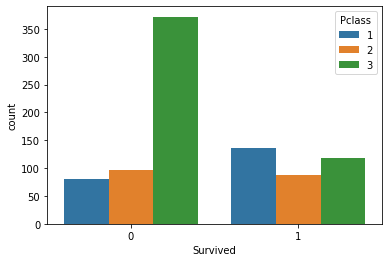

In [46]:
sns.countplot(x='Survived', data=df, hue='Pclass')

<AxesSubplot:ylabel='Pclass'>

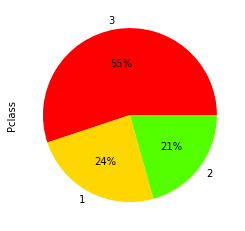

In [106]:
df['Pclass'].value_counts().plot.pie(autopct='%1.0f%%', cmap='prism')

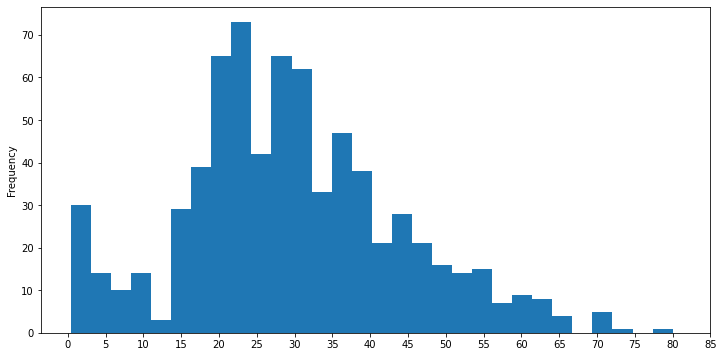

In [90]:
ax = df['Age'].plot.hist(bins=30, figsize=(12, 6))
_ = plt.xticks(range(0, 90, 5))

<AxesSubplot:>

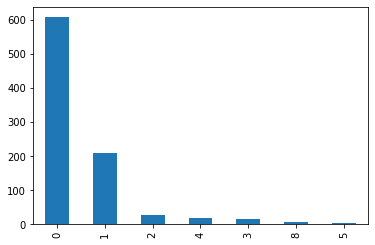

In [83]:
df['SibSp'].value_counts().plot.bar()

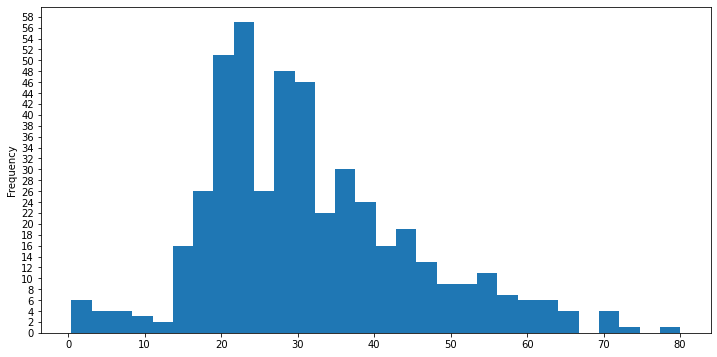

In [108]:
ax = df[df['SibSp'] == 0]['Age'].plot.hist(bins=30, figsize=(12, 6))
_ = plt.yticks(range(0, 60, 2))

<AxesSubplot:ylabel='Frequency'>

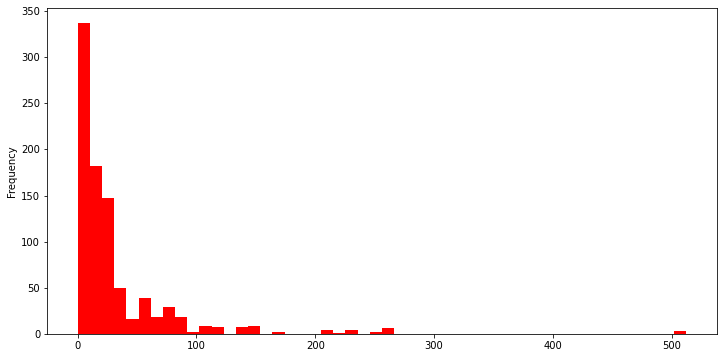

In [114]:
df['Fare'].plot.hist(bins=50, color='red', figsize=(12, 6))

<AxesSubplot:ylabel='Frequency'>

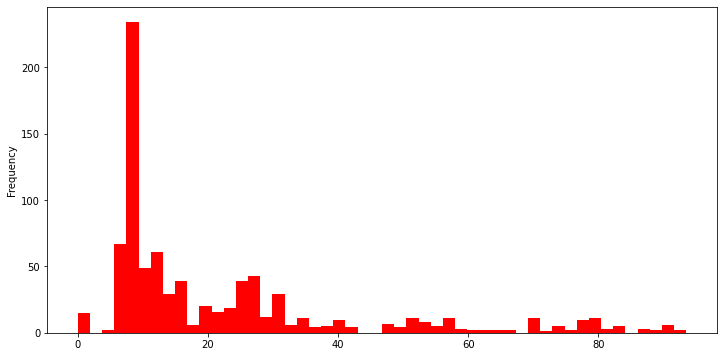

In [117]:
df[df['Fare'] <= 100]['Fare'].plot.hist(bins=50, color='red', figsize=(12, 6))

<AxesSubplot:title={'center':'Age'}, xlabel='[Pclass]'>

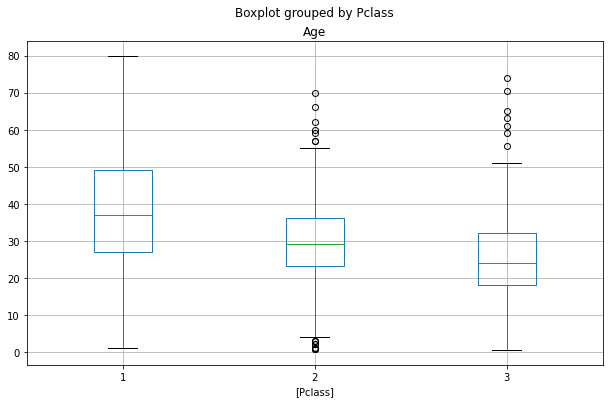

In [30]:
df[['Pclass', 'Age']].boxplot(by='Pclass', figsize=(10,6))

### Preenchendo dados faltantes

In [51]:
df.groupby(by='Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [56]:
def fill_age(x):
    if pd.isnull(x['Age']):
        if x['Pclass'] == 1:
            return 38
        elif x['Pclass'] == 2:
            return 29
        else:
            return 25
        
    return x['Age']

In [57]:
df['Age'] = df.apply(fill_age, axis=1)

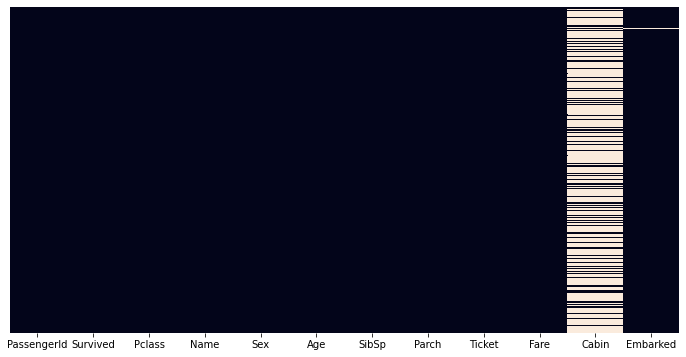

In [59]:
plt.figure(figsize=(12, 6))
_ = sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [65]:
df.drop(['Cabin'], axis=1, inplace=True)

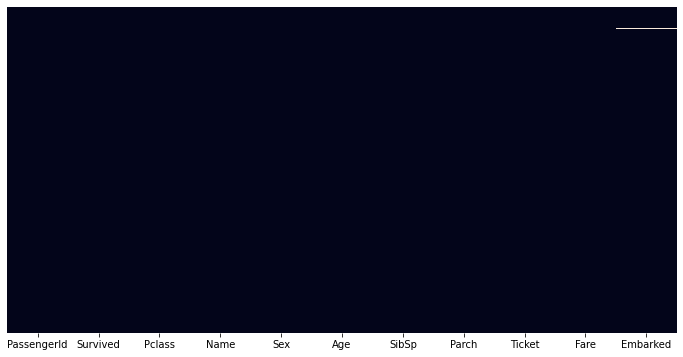

In [66]:
plt.figure(figsize=(12, 6))
_ = sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [67]:
df.dropna(inplace=True)

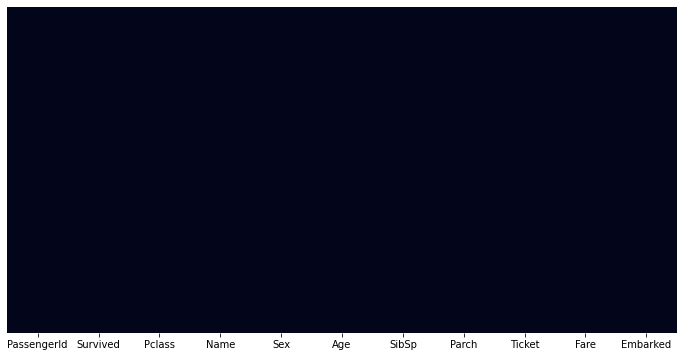

In [68]:
plt.figure(figsize=(12, 6))
_ = sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

### Drabalhando colunas não numéricas

In [71]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [72]:
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [77]:
df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [78]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [80]:
df = pd.concat([df, sex, embarked], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Split dos dados

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [84]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = df['Survived']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Criando um modelo

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
clf = LogisticRegression()

In [89]:
clf.fit(X_train, y_train)

/home/vauxgomes/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predição

In [93]:
y_hat = clf.predict(X_test)

### Qualidade do modelo

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       163
           1       0.80      0.78      0.79       104

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [97]:
print(confusion_matrix(y_hat, y_test))

[[143  20]
 [ 23  81]]
